<a href="https://colab.research.google.com/github/Valcon4717/StudyBuddy/blob/googleCollab/StudyBuddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

**Feature Importance Based on Standardized Coefficients**
*   **Purpose:** Standardized coefficients allow you to compare the relative importance of features, even when their original scales differ. For example, Attendance might have a larger standardized coefficient than Hours_Studied, showing it has a greater impact on Exam_Score
*  **Access To Resources:** A negative coefficient simply means that as the value of "Access_to_Resources" increases, the "Exam_Score" decreases, holding other factors constant. "High Access to Resources" correlate with over-reliance, leading to fewer study hours.
*   **Scaler:** A scaler standardizes data by transforming features to have a mean of 0 and a standard deviation of 1. In linear regression, this makes all features comparable, ensures numerical stability, and helps interpret feature importance (coefficients) more meaningfully without affecting the model's predictions or performance.

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data = pd.read_csv('StudentPerformanceFactors.csv')
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

# Encode categorical features
for column in data.select_dtypes(include=['object']).columns:
    unique_values = data[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    data[column] = data[column].map(mapping)

# Define features and target
features = [
    'Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources',
    'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Tutoring_Sessions',
    'Peer_Influence', 'Physical_Activity'
]
target = 'Exam_Score'
X = data[features]
y = data[target]

# Select top 5 features using f_regression
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
X = data[selected_features]

print("\n---------------------------------------------------- Linear Regression ----------------------------------------------------\n")
# Linear Regression without scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and metrics for unscaled data
y_pred_test = model.predict(X_test)
mse_unscaled = mean_squared_error(y_test, y_pred_test)
mae_unscaled = np.mean(np.abs(y_test - y_pred_test))
r2_unscaled = r2_score(y_test, y_pred_test)

print("Linear Regression (Unscaled Data):")
print(f"MSE: {mse_unscaled:.2f}, MAE: {mae_unscaled:.2f}, R²: {r2_unscaled:.2f}")



---------------------------------------------------- Linear Regression ----------------------------------------------------

Linear Regression (Unscaled Data):
MSE: 5.50, MAE: 1.19, R²: 0.63


In [191]:
print("\n---------------------------------------------- Linear Regression with Scaler ----------------------------------------------\n")
# Linear Regression with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.7, random_state=42)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions and metrics for scaled data
y_pred_scaled = model.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
mae_scaled = np.mean(np.abs(y_test - y_pred_scaled))
r2_scaled = r2_score(y_test, y_pred_scaled)

print("Linear Regression (Scaled Data):")
print(f"MSE: {mse_scaled:.2f}, MAE: {mae_scaled:.2f}, R²: {r2_scaled:.2f}")


---------------------------------------------- Linear Regression with Scaler ----------------------------------------------

Linear Regression (Scaled Data):
MSE: 5.50, MAE: 1.19, R²: 0.63



---------------------------------------- Linear Regression with Feature Importance ----------------------------------------

Feature Importance (Standardized Coefficients):
                Feature  Coefficient
4    Tutoring_Sessions     0.466857
0        Hours_Studied     0.298504
1           Attendance     0.195680
3      Previous_Scores     0.045452
2  Access_to_Resources    -0.911467


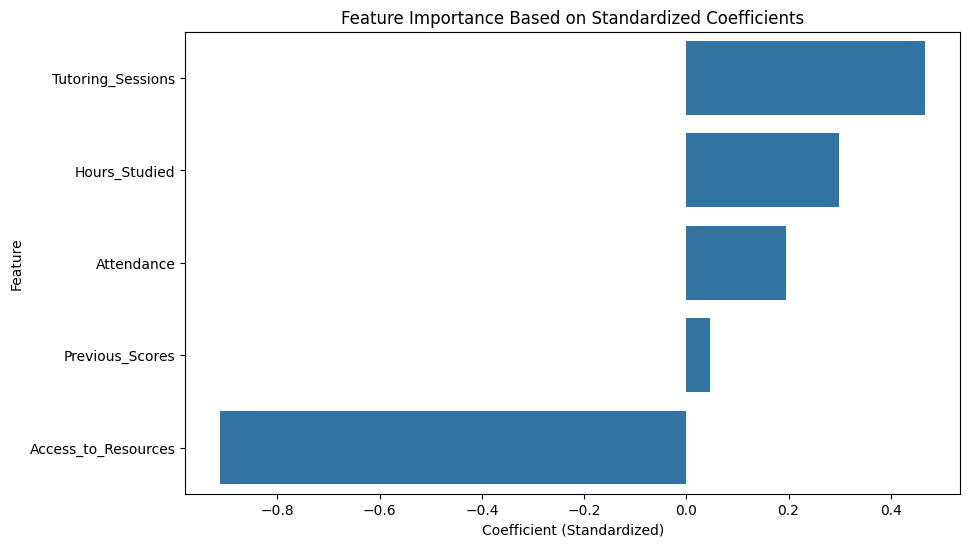

In [195]:
print("\n---------------------------------------- Linear Regression with Feature Importance ----------------------------------------\n")
# Feature Importance with Standardized Coefficients
coefficients = model.coef_
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance (Standardized Coefficients):\n", feature_importance)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title("Feature Importance Based on Standardized Coefficients")
plt.xlabel("Coefficient (Standardized)")
plt.ylabel("Feature")
plt.show()


------------------------------------------- Linear Regression with Scatter Plot -------------------------------------------



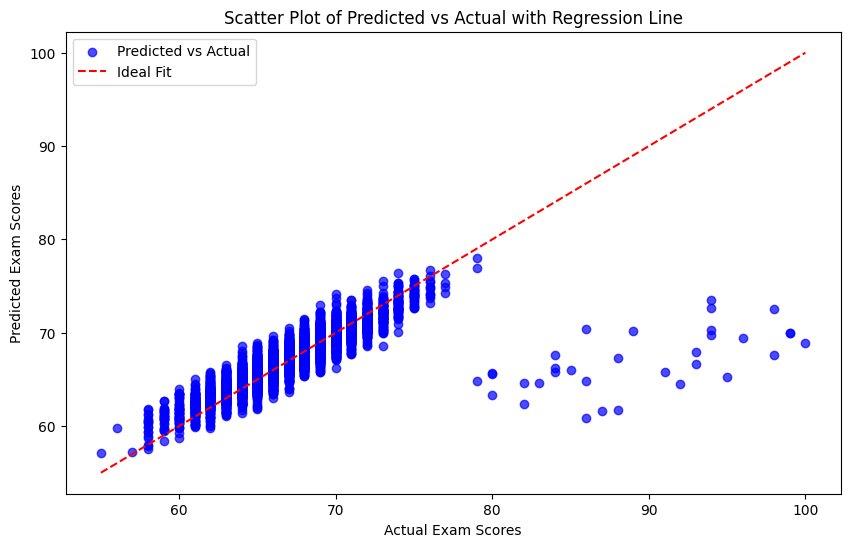

In [193]:
print("\n------------------------------------------- Linear Regression with Scatter Plot -------------------------------------------\n")

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_scaled, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Scatter Plot of Predicted vs Actual with Regression Line")
plt.legend()
plt.show()

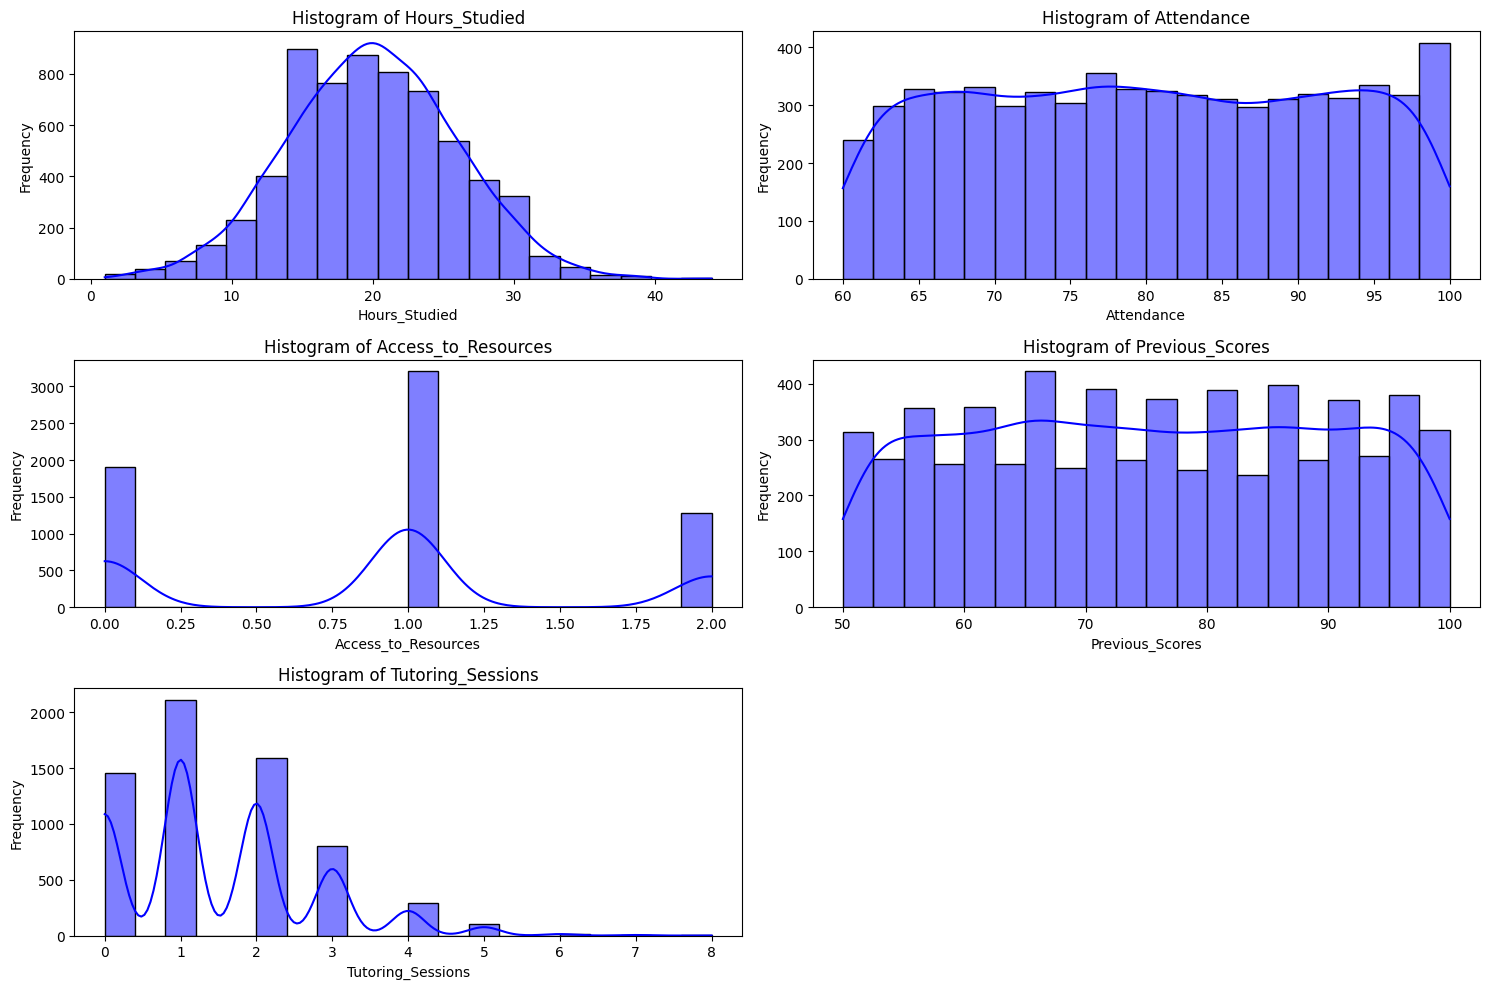

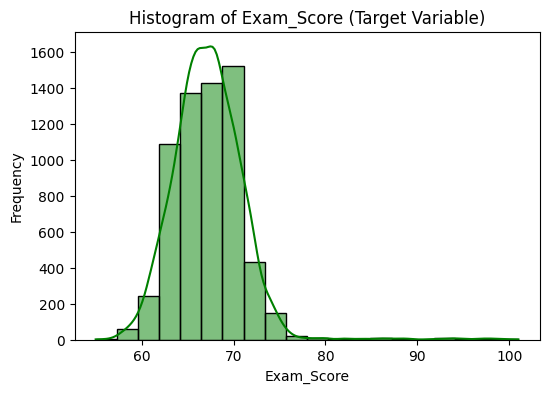

In [23]:
# Plot histograms for the selected features
plt.figure(figsize=(15, 10))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[feature], kde=True, bins=20, color='blue')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Plot histogram for the target variable
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True, bins=20, color='green')
plt.title("Histogram of Exam_Score (Target Variable)")
plt.xlabel("Exam_Score")
plt.ylabel("Frequency")
plt.show()




---



# Random Forest

### Feature Importance Based on Random Forest
*   **Purpose:** In random forest (an ensemble method), feature importance measures how much each feature contributes to improving the model's accuracy. Unlike linear regression, random forest is a non-linear model, so feature importance doesn't rely on coefficients but instead on how the model splits the data during training.
*   **Tree Depth Distribution:** The tree depth distribution is a diagnostic tool for understanding how your Random Forest model learns from the data. It provides actionable insights into model complexity, performance, and efficiency, helping to fine-tune the model for better predictions.
*   **Regularization:** Regularization techniques like limiting tree depth, reducing the number of features considered for splits, or increasing the minimum number of samples per split/leaf prevent trees in the forest from overfitting the training data.

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data = pd.read_csv('StudentPerformanceFactors.csv')
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

# Encode categorical features
for column in data.select_dtypes(include=['object']).columns:
    unique_values = data[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    data[column] = data[column].map(mapping)

# Define features and target
features = [
    'Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources',
    'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Tutoring_Sessions',
    'Peer_Influence', 'Physical_Activity'
]
target = 'Exam_Score'
X = data[features]
y = data[target]

# Select top 5 features using f_regression
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
X = data[selected_features]

print("\n-------------------------------------------------- Random Forest --------------------------------------------------\n")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions and metrics for data
y_pred_test = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Random Forest:")
print(f"MSE: {mse:.2f}, R²: {r2:.2f}")



-------------------------------------------------- Random Forest --------------------------------------------------

Random Forest:
MSE: 6.83, R²: 0.55



----------------------------------------- Random Forest Feature Importance ----------------------------------------


Feature Importance (Random Forest):
                Feature  Importance
1           Attendance    0.422937
0        Hours_Studied    0.294003
3      Previous_Scores    0.161509
4    Tutoring_Sessions    0.066476
2  Access_to_Resources    0.055076


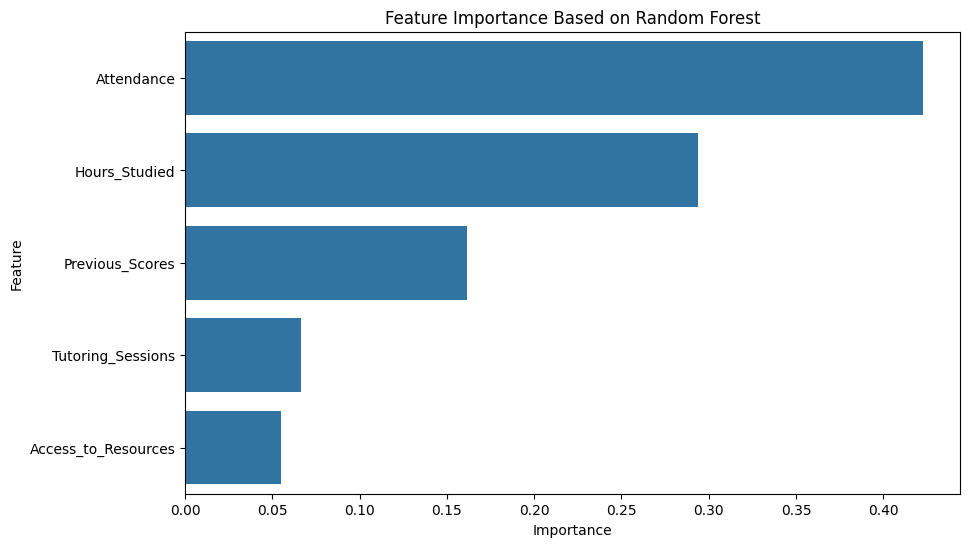

In [198]:
print("\n----------------------------------------- Random Forest Feature Importance ----------------------------------------\n")
# Feature importance
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

# Sort features by importance
forest_importances = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Random Forest):\n", forest_importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=forest_importances['Importance'], y=forest_importances['Feature'])
plt.title("Feature Importance Based on Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


---------------------------------------- Tree Depth Distribution ----------------------------------------



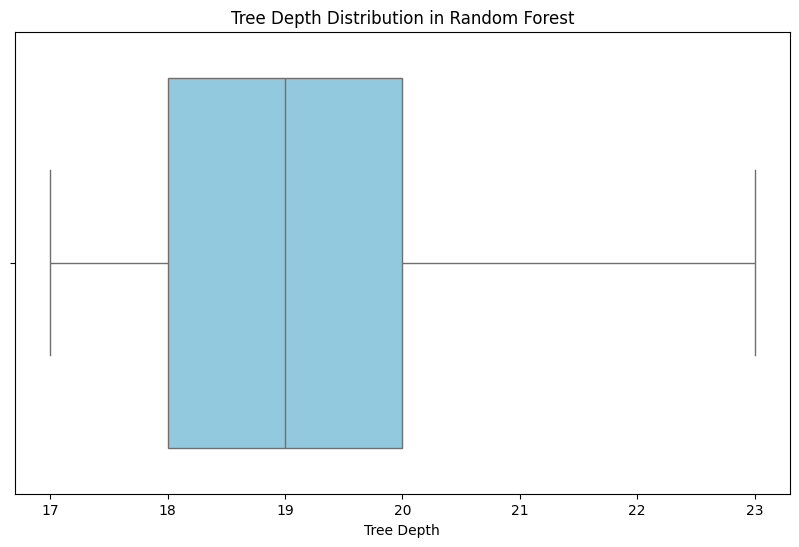

Mean Tree Depth: 18.94
Max Tree Depth: 23
Min Tree Depth: 17


In [199]:
print("\n---------------------------------------- Tree Depth Distribution ----------------------------------------\n")
# Tree Depth Distribution
tree_depths = [tree.get_depth() for tree in rf_model.estimators_]

# Create a box plot for tree depths
plt.figure(figsize=(10, 6))
sns.boxplot(x=tree_depths, color="skyblue")
plt.title("Tree Depth Distribution in Random Forest")
plt.xlabel("Tree Depth")
plt.show()

# Print summary statistics for tree depths
print(f"Mean Tree Depth: {np.mean(tree_depths):.2f}") # 18.94 - moderately deep tree (its ok)
print(f"Max Tree Depth: {np.max(tree_depths)}") # 23 - quite deep (fitting to highly)
print(f"Min Tree Depth: {np.min(tree_depths)}") # 17 - shallow (suggesting some variability)


---------------------------------------- Random Forest with Regularization ----------------------------------------

Random Forest with Regularization:
MSE: 5.94, R²: 0.60



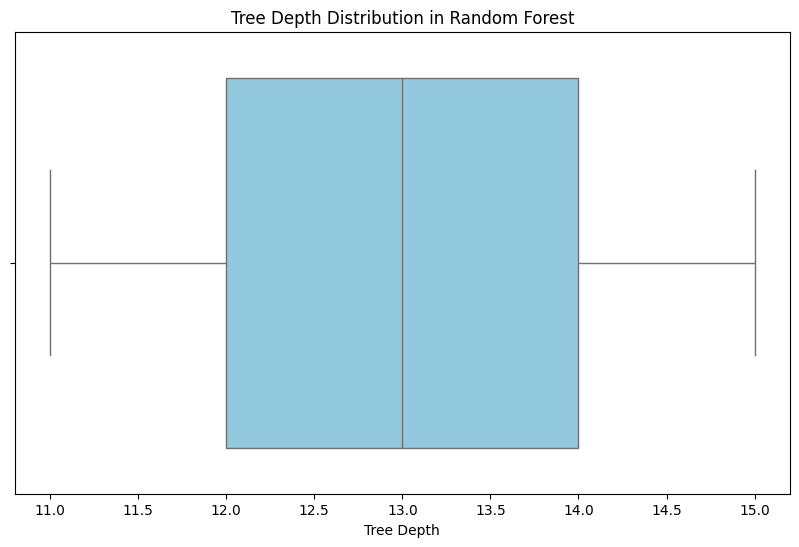

Mean Tree Depth: 13.04
Max Tree Depth: 15
Min Tree Depth: 11


In [203]:
from sklearn.model_selection import RandomizedSearchCV

print("\n---------------------------------------- Random Forest with Regularization ----------------------------------------\n")
# Random Forest with Regularization
rf_model = RandomForestRegressor(
    random_state=42,
    n_estimators=100,  # Number of trees
    max_depth=15,  # Limit tree depth
    max_features='sqrt',  # Use square root of total features
    min_samples_split=10,  # Minimum samples to split a node
    min_samples_leaf=5,  # Minimum samples per leaf
    bootstrap=True  # Enable bootstrapping
)

rf_model.fit(X_train, y_train)

# Predictions and metrics
y_pred_test = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Random Forest with Regularization:")
print(f"MSE: {mse:.2f}, R²: {r2:.2f}\n")

# Tree Depth Distribution
tree_depths = [tree.get_depth() for tree in rf_model.estimators_]

# Create a box plot for tree depths
plt.figure(figsize=(10, 6))
sns.boxplot(x=tree_depths, color="skyblue")
plt.title("Tree Depth Distribution in Random Forest")
plt.xlabel("Tree Depth")
plt.show()

# Print summary statistics for tree depths
print(f"Mean Tree Depth: {np.mean(tree_depths):.2f}") # 18.94 - moderately deep tree (its ok)
print(f"Max Tree Depth: {np.max(tree_depths)}") # 23 - quite deep (fitting to highly)
print(f"Min Tree Depth: {np.min(tree_depths)}") # 17 - shallow (suggesting some variability)



---



# Lasso Regression

### Feature Importance Based on Lasso Regression Coefficients
*   **Purpose:** Lasso regression (L1 regularization) improves accuracy and prevents overfitting by adding a penalty to the model that shrinks some feature coefficients to zero. This effectively removes less important features from the model, making it a great choice for feature selection. It’s particularly useful when working with datasets where many features may be irrelevant or redundant.

*   **Scaler:** scaling often helps Lasso regression, but it might not always improve performance for every dataset. It depends on how well the unscaled features were already aligned for the regularization penalty. Here, scaling made a minor difference, but it didn't harm the R² score




In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data = pd.read_csv('StudentPerformanceFactors.csv')
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

# Encode categorical features
for column in data.select_dtypes(include=['object']).columns:
    unique_values = data[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    data[column] = data[column].map(mapping)

# Define features and target
features = [
    'Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources',
    'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Tutoring_Sessions',
    'Peer_Influence', 'Physical_Activity'
]
target = 'Exam_Score'
X = data[features]
y = data[target]

# Select top 5 features using f_regression
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
X = data[selected_features]

print("\n---------------------------------------------------- Lasso Regression ----------------------------------------------------\n")
# 1. Lasso Regression without scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Train the Lasso regression model
lasso_model = Lasso(alpha=0.1, random_state=42)  # Alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Predictions and metrics for unscaled data
y_pred_test = lasso_model.predict(X_test)
mse_unscaled = mean_squared_error(y_test, y_pred_test)
mae_unscaled = np.mean(np.abs(y_test - y_pred_test))
r2_unscaled = r2_score(y_test, y_pred_test)

print("Lasso Regression (Unscaled Data):")
print(f"MSE: {mse_unscaled:.2f}, MAE: {mae_unscaled:.2f}, R²: {r2_unscaled:.2f}")


---------------------------------------------------- Lasso Regression ----------------------------------------------------

Lasso Regression (Unscaled Data):
MSE: 5.56, MAE: 1.20, R²: 0.63


In [5]:
print("\n---------------------------------------------- Lasso Regression with Scaler ----------------------------------------------\n")
# 2. Lasso Regression with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.7, random_state=42)
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# Predictions and metrics for scaled data
y_pred_scaled = lasso_model.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
mae_scaled = np.mean(np.abs(y_test - y_pred_scaled))
r2_scaled = r2_score(y_test, y_pred_scaled)

print("Lasso Regression (Scaled Data):")
print(f"MSE: {mse_scaled:.2f}, MAE: {mae_scaled:.2f}, R²: {r2_scaled:.2f}")


---------------------------------------------- Lasso Regression with Scaler ----------------------------------------------

Lasso Regression (Scaled Data):
MSE: 5.58, MAE: 1.21, R²: 0.63



---------------------------------------- Lasso Regression with Feature Importance ----------------------------------------

Feature Importance (Lasso Coefficients):
                Feature  Coefficient
1           Attendance     2.161640
0        Hours_Studied     1.686913
3      Previous_Scores     0.557569
4    Tutoring_Sessions     0.475503
2  Access_to_Resources    -0.537628


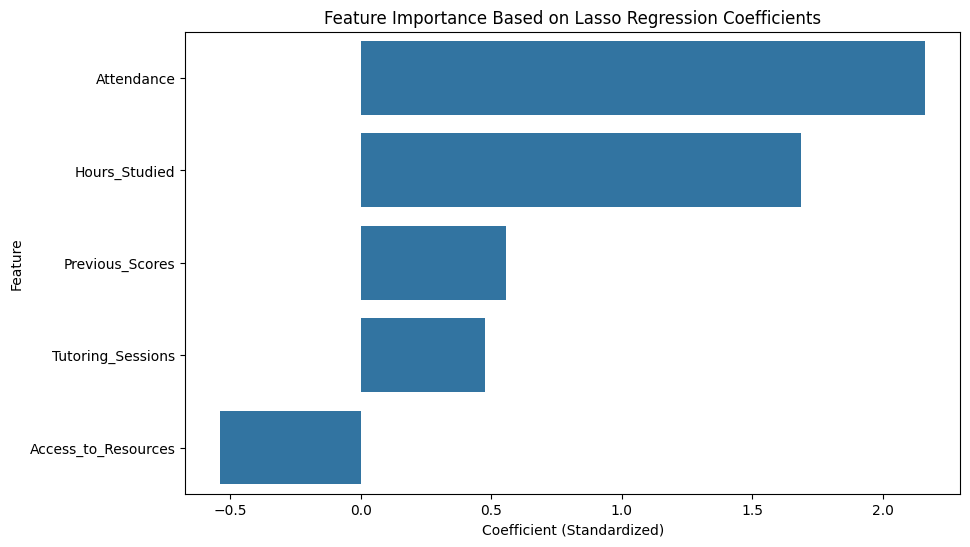

In [6]:
print("\n---------------------------------------- Lasso Regression with Feature Importance ----------------------------------------\n")
# Feature Importance with Standardized Coefficients
coefficients = lasso_model.coef_
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance (Lasso Coefficients):\n", feature_importance)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title("Feature Importance Based on Lasso Regression Coefficients")
plt.xlabel("Coefficient (Standardized)")
plt.ylabel("Feature")
plt.show()

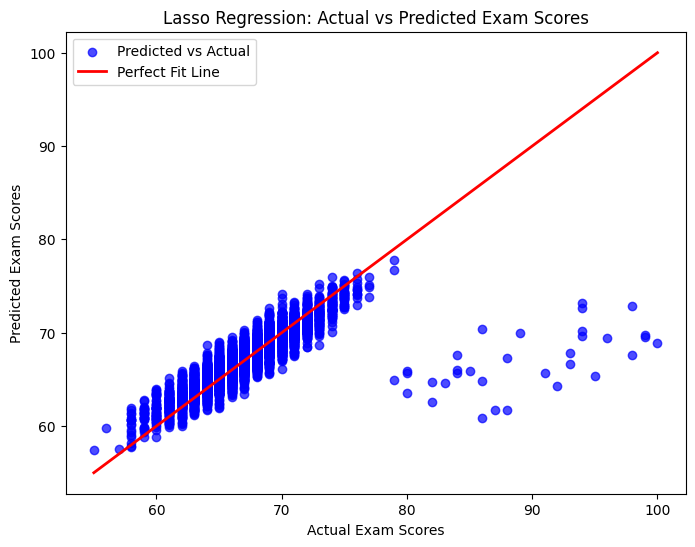

In [7]:
# Scatter plot of actual vs predicted values with the regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Fit Line')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Lasso Regression: Actual vs Predicted Exam Scores")
plt.legend()
plt.show()



---



# Ridge Regression

### Ridge Regression with Feature Importance
*   **Purpose:** Ridge regression (L2 regularization) adds a penalty to the model that shrinks all feature coefficients toward zero but does not remove any features. This helps reduce multicollinearity and overfitting while retaining all features in the model. Ridge is ideal when all features are believed to contribute meaningfully to the target variable.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data = pd.read_csv('StudentPerformanceFactors.csv')
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

# Encode categorical features
for column in data.select_dtypes(include=['object']).columns:
    unique_values = data[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    data[column] = data[column].map(mapping)

# Define features and target
features = [
    'Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources',
    'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Tutoring_Sessions',
    'Peer_Influence', 'Physical_Activity'
]
target = 'Exam_Score'
X = data[features]
y = data[target]

# Select top 5 features using f_regression
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
X = data[selected_features]

print("\n---------------------------------------------------- Ridge Regression ----------------------------------------------------\n")
# 1. Ridge Regression without scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Train the Ridge regression model
ridge_model = Ridge(alpha=1.0, random_state=42)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Predictions and metrics for unscaled data
y_pred_test = ridge_model.predict(X_test)
mse_unscaled = mean_squared_error(y_test, y_pred_test)
mae_unscaled = np.mean(np.abs(y_test - y_pred_test))
r2_unscaled = r2_score(y_test, y_pred_test)

print("Ridge Regression (Unscaled Data):")
print(f"MSE: {mse_unscaled:.2f}, MAE: {mae_unscaled:.2f}, R²: {r2_unscaled:.2f}")



---------------------------------------------------- Ridge Regression ----------------------------------------------------

Ridge Regression (Unscaled Data):
MSE: 5.50, MAE: 1.19, R²: 0.63


In [10]:
print("\n---------------------------------------------- Ridge Regression with Scaler ----------------------------------------------\n")
# 2. Ridge Regression with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.7, random_state=42)
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

# Predictions and metrics for scaled data
y_pred_scaled = ridge_model.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
mae_scaled = np.mean(np.abs(y_test - y_pred_scaled))
r2_scaled = r2_score(y_test, y_pred_scaled)

print("Ridge Regression (Scaled Data):")
print(f"MSE: {mse_scaled:.2f}, MAE: {mae_scaled:.2f}, R²: {r2_scaled:.2f}")


---------------------------------------------- Ridge Regression with Scaler ----------------------------------------------

Ridge Regression (Scaled Data):
MSE: 5.50, MAE: 1.19, R²: 0.63



---------------------------------------- Ridge Regression with Feature Importance ----------------------------------------

Feature Importance (Ridge Coefficients):
                Feature  Coefficient
1           Attendance     2.258902
0        Hours_Studied     1.785613
3      Previous_Scores     0.654142
4    Tutoring_Sessions     0.575754
2  Access_to_Resources    -0.636400


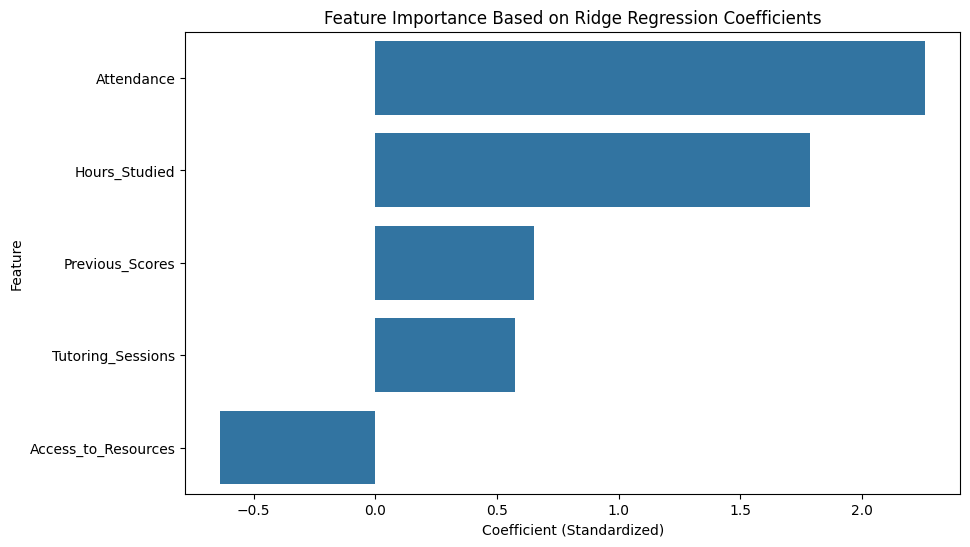

In [13]:
print("\n---------------------------------------- Ridge Regression with Feature Importance ----------------------------------------\n")
# Feature Importance with Standardized Coefficients
coefficients = ridge_model.coef_
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance (Ridge Coefficients):\n", feature_importance)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title("Feature Importance Based on Ridge Regression Coefficients")
plt.xlabel("Coefficient (Standardized)")
plt.ylabel("Feature")
plt.show()


------------------------------------------- Ridge Regression with Scatter Plot -------------------------------------------



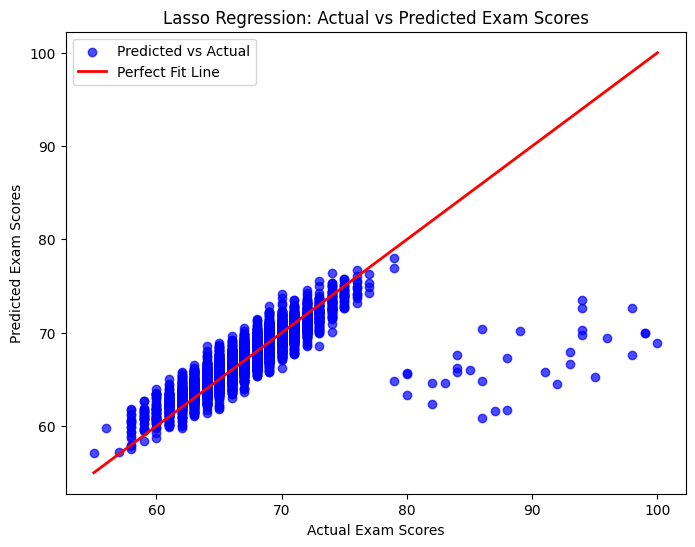

In [14]:
print("\n------------------------------------------- Ridge Regression with Scatter Plot -------------------------------------------\n")

# Scatter plot of actual vs predicted values with the regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Fit Line')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Lasso Regression: Actual vs Predicted Exam Scores")
plt.legend()
plt.show()